In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("HousingData.csv")

# Show first few rows
print("Dataset Preview:")
print(df.head())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()



Dataset Preview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Missing Values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [3]:
# Features and target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling the features (recommended for housing data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)




Model Evaluation:
Mean Squared Error (MSE): 31.45404766495087
R² Score: 0.6270849941673191


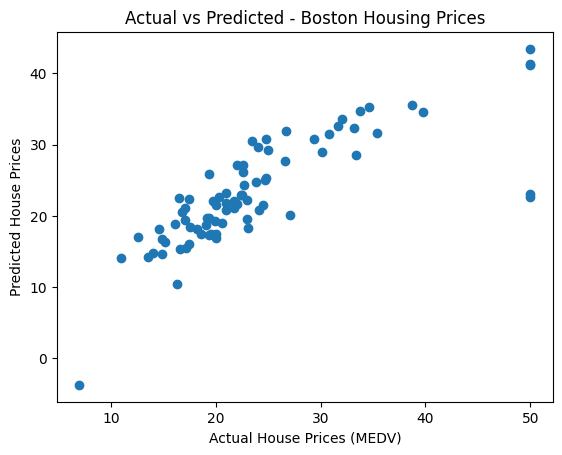

In [4]:
# Plot Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices (MEDV)")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted - Boston Housing Prices")
plt.show()


In [5]:
# Example input (You can change values)
sample_house = {
    'CRIM': 0.1,
    'ZN': 18.0,
    'INDUS': 2.3,
    'CHAS': 0,
    'NOX': 0.45,
    'RM': 6.8,
    'AGE': 60.0,
    'DIS': 4.1,
    'RAD': 4,
    'TAX': 300,
    'PTRATIO': 17.5,
    'B': 380.0,
    'LSTAT': 5.0
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_house])

# Scale using same scaler
sample_scaled = scaler.transform(sample_df)

# Predict
predicted_price = model.predict(sample_scaled)[0]

print("\nPredicted MEDV for sample house:", predicted_price)


Predicted MEDV for sample house: 30.558493658685954
